In [77]:
import numpy as np
import pandas as pd 
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

In [211]:
data_train=pd.read_excel('Data_Train.xlsx')

In [212]:
data_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [213]:
data_train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50


In [214]:
data_train.shape

(6019, 12)

## EDA

In [81]:
brand_name=[]
model_name=[]
for index, rows in data_train.iterrows():
    brand_name.append(rows['Name'].split()[0].lower())
    model_name.append(rows['Name'].split()[1].lower())

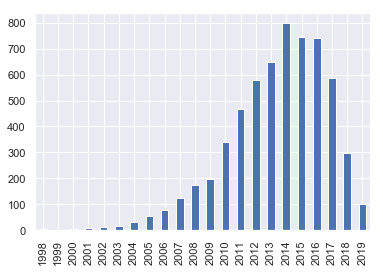

In [82]:

data_train.Year.value_counts().sort_index().plot(kind='bar')
plt.show()

<h2>Univariate Analysis</h2>

<h2>Location</h2>

In [83]:
data_train.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

<b>Data Distribution among the cities</b>

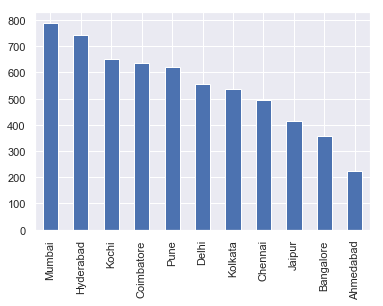

In [84]:
import matplotlib.pyplot as plt
data_train.Location.value_counts().plot(kind='bar')
plt.show()

<h2>Brand Name</h2>

In [85]:
brand_name=[]
model_name=[]
for index, rows in data_train.iterrows():
    #print(rows['Name'].split())
    brand_name.append(rows['Name'].split()[0].lower().replace('-',''))
    model_name.append(rows['Name'].split()[1].lower())

In [86]:
data_train['Brand']=brand_name

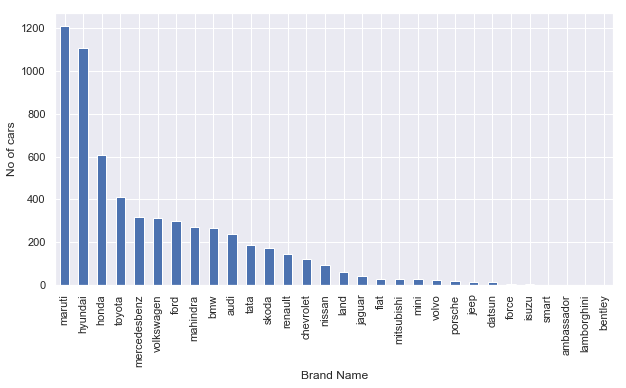

In [87]:
plt.rcParams["figure.figsize"] = [10,5]
data_train.Brand.value_counts().plot(kind='bar')
plt.xlabel('Brand Name')
plt.ylabel('No of cars')
plt.show()

<b>Maruti and hyundai are the highest no of cars in the dataset</b>

<h2>Year</h2>

In [88]:
data_train.Year.describe()

count    6019.000000
mean     2013.358199
std         3.269742
min      1998.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64

<b>We have data from 1998 to 2019</b>

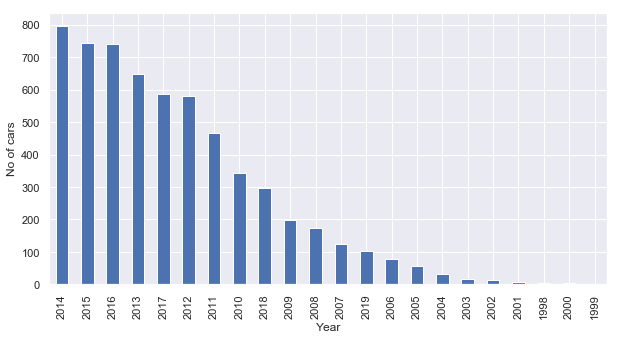

In [89]:
data_train.Year.value_counts().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('No of cars')
plt.show()

<b>More data is available from 2010-2018</b>

In [90]:
import numpy as np
#a = np.array([1,2,3,4,5])
p=[]
for i in range(1,101,1):
    p.append(np.percentile(data_train.Kilometers_Driven, i)) # return 50th percentile, e.g median.

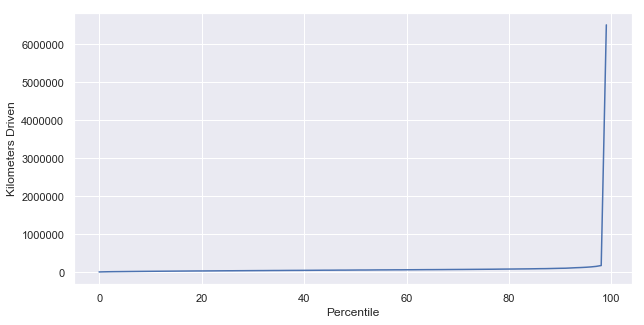

In [91]:
plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Kilometers Driven')
plt.show()

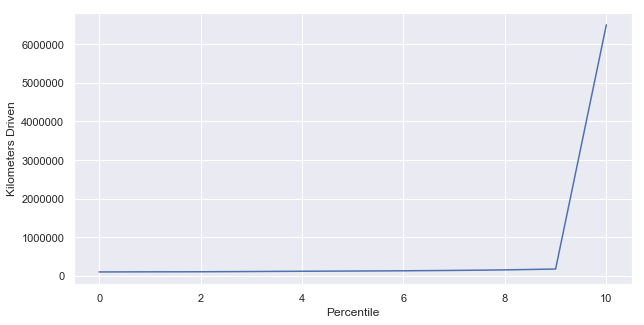

In [92]:
p=[]
for i in range(90,101,1):
    p.append(np.percentile(data_train.Kilometers_Driven, i)) # return 50th percentile, e.g median.

plt.plot(p)
plt.xlabel('Percentile')
plt.ylabel('Kilometers Driven')
plt.show()

<b>Only one value is around 60L, which could be an outlier</b>

In [93]:
data_train[data_train.Kilometers_Driven>=600000]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,7.5,skoda
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.7,hyundai
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.9,volkswagen
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,bmw


<h2>Fuel_Type</h2>

In [94]:
data_train.Fuel_Type.value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

<b>More cars are of diesel and petrol type</b>

<h2>Transmission</h2>

In [95]:
data_train.Transmission.value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

<h2>Owner Type</h2>

In [96]:
data_train.Owner_Type.value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

<h2>Null columns</h2>

In [97]:
for i in data_train.columns:
    if len(data_train[data_train[i].isnull()].index)>0:
        print(i,' Has Null values count : ',len(data_train[data_train[i].isnull()].index))

Mileage  Has Null values count :  2
Engine  Has Null values count :  36
Power  Has Null values count :  36
Seats  Has Null values count :  42


<h2>Mileage</h2>

In [98]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,audi


In [99]:
data_train[data_train['Mileage'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00,mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75,toyota


In [100]:
data_train['is_electric']=data_train['Fuel_Type'].apply(lambda x: 1 if x=='Electric' else 0)    

In [101]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai,0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,honda,0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,maruti,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,audi,0


## Removing the units

In [102]:
Mileage_cleaned=[]
Engine_cleaned=[]
power_cleaned=[]
for index, rows in data_train.iterrows():
    #print(rows['Name'].split())
    try:
        Mileage_cleaned.append(rows['Mileage'].split()[0])
    except:
        Mileage_cleaned.append(0)
    try:
        Engine_cleaned.append(rows['Engine'].split()[0])
    except:
        Engine_cleaned.append(0)
    try:
        if rows['Power'].split()[0]=='null':
            power_cleaned.append(0)
        else:
            power_cleaned.append(rows['Power'].split()[0])
    except:
        power_cleaned.append(0)
    #print(rows['Mileage'].split()[1].lower())

In [103]:
data_train['Mileage_cleaned']=Mileage_cleaned
data_train.Mileage_cleaned = data_train.Mileage_cleaned.astype(float)
data_train['Engine_cleaned']=Engine_cleaned
data_train.Engine_cleaned = data_train.Engine_cleaned.astype(float)
data_train['Power_cleaned']=power_cleaned
data_train.Power_cleaned = data_train.Power_cleaned.astype(float)

In [104]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,maruti,0,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,hyundai,0,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,honda,0,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,maruti,0,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,audi,0,15.20,1968.0,140.80


<h2>Engine</h2>

In [105]:
data_train[ (data_train.Engine_cleaned.between(2179,3000))]['Mileage_cleaned'].mean()

13.019018595041299

In [106]:
Mileage_missing=[]
for i,j in data_train[(data_train['Mileage_cleaned']==0)].iterrows():
    if j.Engine_cleaned!=0:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data_train[(data_train.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50)) & (data_train.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(data_train[(data_train.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
    else:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data_train[(data_train.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(0)

In [107]:
data_train.to_pickle('data_train')

In [108]:
import pandas as pd
data_train = pd.read_pickle('data_train')

<h2>Filling up null values for Mileage</h2>

In [109]:
j=0
for i in data_train[(data_train['Mileage_cleaned']==0)]['Mileage_cleaned'].index.tolist():
    data_train['Mileage_cleaned'].iloc[i]=Mileage_missing[j]
    j+=1

In [110]:
data_train.Mileage_cleaned[data_train.Mileage_cleaned == 0] = data_train['Mileage_cleaned'].mean()

In [111]:
data_train['Mileage_cleaned'].describe()

count    6019.000000
mean       18.328940
std         4.169318
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage_cleaned, dtype: float64

In [112]:
for i in data_train.columns:
    if len(data_train[data_train[i].isnull()].index)>0:
        print(i,' Has Null values count : ',len(data_train[data_train[i].isnull()].index))

Mileage  Has Null values count :  2
Engine  Has Null values count :  36
Power  Has Null values count :  36
Seats  Has Null values count :  42


In [208]:
data_train.shape

(6019, 17)

<h2>Filling up missing values for engine</h2>

In [113]:
P_M = data_train[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Manual')].Engine_cleaned.mean()
D_M = data_train[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Manual')].Engine_cleaned.mean()
D_A = data_train[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Automatic')].Engine_cleaned.mean()
P_A = data_train[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Automatic')].Engine_cleaned.mean()

In [114]:
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Manual') & (data_train['Engine_cleaned']==0)] = P_M
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Manual') & (data_train['Engine_cleaned']==0)] = D_M
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Diesel') & (data_train['Transmission']=='Automatic') & (data_train['Engine_cleaned']==0)] = D_A
data_train.Engine_cleaned.loc[(data_train['Fuel_Type']=='Petrol') & (data_train['Transmission']=='Automatic') & (data_train['Engine_cleaned']==0)] = P_A

In [115]:
data_train['Engine_cleaned'].describe()

count    6019.000000
mean     1620.273483
std       600.566802
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine_cleaned, dtype: float64

<h2>Filling up missing values for power</h2>

In [116]:
data_train[data_train.Power_cleaned == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5.0,2.00,ford,0,17.800000,1399.000000,0.0
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.30,hyundai,0,19.988571,1086.000000,0.0
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5.0,2.10,hyundai,0,17.000000,1086.000000,0.0
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5.0,0.85,hyundai,0,17.000000,1086.000000,0.0
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,1.67,hyundai,0,17.000000,1086.000000,0.0
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,honda,0,18.295504,1222.527154,0.0
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,maruti,0,16.100000,1222.527154,0.0
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.8 kmpl,1248 CC,null bhp,5.0,4.10,maruti,0,17.800000,1248.000000,0.0
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5.0,0.95,hyundai,0,17.000000,1086.000000,0.0
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5.0,1.75,hyundai,0,19.988571,1086.000000,0.0


In [117]:
Power_missing=[]
for i,j in data_train[(data_train['Power_cleaned']==0)].iterrows():
    Power_missing.append(data_train[(data_train.Mileage_cleaned.between(j.Mileage_cleaned-20,j.Mileage_cleaned+20)) 
                                      & (data_train.Engine_cleaned.between(j.Engine_cleaned-200,j.Engine_cleaned+200))]
                           ['Power_cleaned'].mean())

In [118]:
data_train['Power_cleaned'].describe()

count    6019.000000
mean      110.562372
std        55.956041
min         0.000000
25%        74.000000
50%        91.100000
75%       138.030000
max       560.000000
Name: Power_cleaned, dtype: float64

In [119]:
j=0
for i in data_train[(data_train['Power_cleaned']==0)]['Power_cleaned'].index.tolist():
    data_train['Power_cleaned'].iloc[i]=Power_missing[j]
    j+=1

<h2>Seats</h2>

In [120]:
data_train.Seats.mean()

5.278735151413753

In [207]:
data_train.shape

(6019, 17)

<h2>Filling up missing values</h2>

In [203]:
seats_missing=[]
for i,j in data_train[(data_train.Seats.isnull()) | (data_train.Seats== 0)].iterrows():
    seats_missing.append(data_train[data_train['Name'].str.match(" ".join((j['Name'].split()[0],j['Name'].split()[1])))]['Seats'].mean())
    

In [204]:
j=0
for i in data_train[(data_train.Seats.isnull()) | (data_train.Seats== 0)].index.tolist():
    data_train['Seats'].iloc[i]=seats_missing[j]
    j+=1

In [205]:
data_train.Seats[data_train.Seats == 0] = data_train['Seats'].mean()

In [206]:
data_train.shape

(6019, 17)

# Applying Same for Test data

In [128]:
data_test = pd.read_excel('Data_Test.xlsx')

In [130]:
brand_name=[]
model_name=[]
for index, rows in data_test.iterrows():
    brand_name.append(rows['Name'].split()[0].lower().replace('-',''))
    model_name.append(rows['Name'].split()[1].lower())

data_test['Brand']=brand_name

In [131]:
for i in data_test.columns:
    if len(data_test[data_test[i].isnull()].index)>0:
        print(i,' Has Null values count : ',len(data_test[data_test[i].isnull()].index))

Engine  Has Null values count :  10
Power  Has Null values count :  10
Seats  Has Null values count :  11


In [132]:
data_test['is_electric']=data_test['Fuel_Type'].apply(lambda x: 1 if x=='Electric' else 0)    

In [133]:
Mileage_cleaned=[]
Engine_cleaned=[]
power_cleaned=[]
for index, rows in data_test.iterrows():
    
    try:
        Mileage_cleaned.append(rows['Mileage'].split()[0])
    except:
        Mileage_cleaned.append(0)
    try:
        Engine_cleaned.append(rows['Engine'].split()[0])
    except:
        Engine_cleaned.append(0)
    try:
        if rows['Power'].split()[0]=='null':
            power_cleaned.append(0)
        else:
            power_cleaned.append(rows['Power'].split()[0])
    except:
        power_cleaned.append(0)
    

In [134]:
data_test['Mileage_cleaned']=Mileage_cleaned
data_test.Mileage_cleaned = data_test.Mileage_cleaned.astype(float)
data_test['Engine_cleaned']=Engine_cleaned
data_test.Engine_cleaned = data_test.Engine_cleaned.astype(float)
data_test['Power_cleaned']=power_cleaned
data_test.Power_cleaned = data_test.Power_cleaned.astype(float)

In [135]:
Mileage_missing=[]
for i,j in data_test[(data_test['Mileage_cleaned']==0)].iterrows():
    if j.Engine_cleaned!=0:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data_test[(data_test.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50)) & (data_test.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(data_test[(data_test.Engine_cleaned.between(j.Engine_cleaned-100,j.Engine_cleaned+100))]['Mileage_cleaned'].mean())
    else:
        if j.Power_cleaned!=0:
            Mileage_missing.append(data_test[(data_test.Power_cleaned.between(j.Power_cleaned-50,j.Power_cleaned+50))]['Mileage_cleaned'].mean())
        else:
            Mileage_missing.append(0)

In [136]:
j=0
for i in data_test[(data_test['Mileage_cleaned']==0)]['Mileage_cleaned'].index.tolist():
    data_test['Mileage_cleaned'].iloc[i]=Mileage_missing[j]
    j+=1

In [137]:
data_test.Mileage_cleaned[data_test.Mileage_cleaned == 0] = data_test['Mileage_cleaned'].mean()

In [138]:
for i in data_test.columns:
    if len(data_test[data_test[i].isnull()].index)>0:
        print(i,' Has Null values count : ',len(data_test[data_test[i].isnull()].index))

Engine  Has Null values count :  10
Power  Has Null values count :  10
Seats  Has Null values count :  11


In [139]:
P_M = data_test[(data_test['Fuel_Type']=='Petrol') & (data_test['Transmission']=='Manual')].Engine_cleaned.mean()
D_M = data_test[(data_test['Fuel_Type']=='Diesel') & (data_test['Transmission']=='Manual')].Engine_cleaned.mean()
D_A = data_test[(data_test['Fuel_Type']=='Diesel') & (data_test['Transmission']=='Automatic')].Engine_cleaned.mean()
P_A = data_test[(data_test['Fuel_Type']=='Petrol') & (data_test['Transmission']=='Automatic')].Engine_cleaned.mean()

data_test.Engine_cleaned.loc[(data_test['Fuel_Type']=='Petrol') & (data_test['Transmission']=='Manual') & (data_test['Engine_cleaned']==0)] = P_M
data_test.Engine_cleaned.loc[(data_test['Fuel_Type']=='Diesel') & (data_test['Transmission']=='Manual') & (data_test['Engine_cleaned']==0)] = D_M
data_test.Engine_cleaned.loc[(data_test['Fuel_Type']=='Diesel') & (data_test['Transmission']=='Automatic') & (data_test['Engine_cleaned']==0)] = D_A
data_test.Engine_cleaned.loc[(data_test['Fuel_Type']=='Petrol') & (data_test['Transmission']=='Automatic') & (data_test['Engine_cleaned']==0)] = P_A

In [140]:
Power_missing=[]
for i,j in data_test[(data_test['Power_cleaned']==0)].iterrows():
    Power_missing.append(data_test[(data_test.Mileage_cleaned.between(j.Mileage_cleaned-20,j.Mileage_cleaned+20)) 
                                      & (data_test.Engine_cleaned.between(j.Engine_cleaned-200,j.Engine_cleaned+200))]
                           ['Power_cleaned'].mean())

In [141]:
j=0
for i in data_test[(data_test['Power_cleaned']==0)]['Power_cleaned'].index.tolist():
    data_test['Power_cleaned'].iloc[i]=Power_missing[j]
    j+=1

In [142]:
seats_missing=[]
for i,j in data_test[(data_test.Seats.isnull()) | (data_test.Seats== 0)].iterrows():
    seats_missing.append(round(data_test[data_test['Name'].str.match(" ".join((j['Name'].split()[0],j['Name'].split()[1])))]['Seats'].mean()))

In [143]:
j=0
for i in data_test[(data_test.Seats.isnull()) | (data_test.Seats== 0)].index.tolist():
    data_test['Seats'].iloc[i]=seats_missing[j]
    j+=1

In [144]:
data_test.Seats[data_test.Seats == 0] = data_test['Seats'].mean()

<h2>Saving data to pickle file</h2>

In [146]:
data_test.to_pickle('data_test_after_cleanup')

In [147]:
data_train.to_pickle('data_train_after_cleanup')

In [148]:
data_train_cleaned = pd.read_pickle('data_train_after_cleanup')
data_test_cleaned = pd.read_pickle('data_test_after_cleanup')

<h2>Converting categorical variables into one hot encoded features</h2>

In [149]:
data_test_cleaned.shape

(1234, 16)

In [150]:
data_train_cleaned.shape

(6019, 17)

In [151]:
data_train_dup=data_train_cleaned.copy()
data_test_dup=data_test_cleaned.copy()

In [154]:
data_train_target = data_train_cleaned['Price']
data_train_final = data_train_cleaned.drop(['Name','Mileage','Engine','Power','Price'],axis=1)

In [216]:
data_train_target.shape


(6019,)

In [155]:
data_train_final.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Brand', 'is_electric', 'Mileage_cleaned',
       'Engine_cleaned', 'Power_cleaned'],
      dtype='object')

In [156]:
#data_test_target = data_test_cleaned['Price']
data_test_final = data_test_cleaned.drop(['Name','Mileage','Engine','Power'],axis=1)

In [157]:
data_test_final.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Brand,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
0,Delhi,2014,40929,CNG,Manual,First,4.0,maruti,0,32.26,998.0,58.200000
1,Coimbatore,2013,54493,Petrol,Manual,Second,5.0,maruti,0,24.70,796.0,47.300000
2,Mumbai,2017,34000,Diesel,Manual,First,7.0,toyota,0,13.68,2393.0,147.800000
3,Hyderabad,2012,139000,Diesel,Manual,First,5.0,toyota,0,23.59,1364.0,84.273111
4,Mumbai,2014,29000,Petrol,Manual,First,5.0,hyundai,0,18.50,1197.0,82.850000


<h2>Normalizing train data</h2>

In [158]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven','Mileage_cleaned','Engine_cleaned', 'Power_cleaned']:
    data_train_final[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(data_train_final[i].values.astype(float).reshape(-1,1))

In [217]:
data_train_target.shape


(6019,)

<h2>Normalizing test data</h2>

In [159]:
from sklearn.preprocessing import MinMaxScaler
for i in ['Kilometers_Driven','Mileage_cleaned','Engine_cleaned', 'Power_cleaned']:
    data_test_final[i] = MinMaxScaler(feature_range=(0,1)).fit_transform(data_test_final[i].values.astype(float).reshape(-1,1))

In [174]:
from sklearn.model_selection import train_test_split

In [218]:
data_train_target.shape


(6019,)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(data_train_final, data_train_target, test_size=0.33)

In [222]:
y_train.shape

(4032,)

In [223]:
X_train.shape

(4032, 12)

<h2>Converting train to one hot encoded data</h2>

In [224]:
import category_encoders as ce

In [225]:
ohe = ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
ohe.fit(data_train_final)

OneHotEncoder(cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'],
       drop_invariant=False, handle_missing='value',
       handle_unknown='ignore', return_df=True, use_cat_names=True,
       verbose=0)

In [229]:
X_train_ohe=ohe.transform(X_train)

In [230]:
X_train_ohe.head()

,Location_Mumbai,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,...,Brand_smart,Brand_ambassador,Brand_isuzu,Brand_force,Brand_bentley,Brand_lamborghini,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
956,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.611643,0.223422,0.106124
5753,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.517686,0.234391,0.094332
1918,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.373987,0.319946,0.215500
4664,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.449521,0.189841,0.098136
5572,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.389094,0.319946,0.197471


In [231]:
X_train_ohe.shape

(4032, 59)

<h2>Converting test to one hot encoded data</h2>

In [232]:
ohe = ce.OneHotEncoder(handle_unknown='ignore',use_cat_names=True)
ohe.fit(data_train_final)

OneHotEncoder(cols=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand'],
       drop_invariant=False, handle_missing='value',
       handle_unknown='ignore', return_df=True, use_cat_names=True,
       verbose=0)

In [233]:
X_test_ohe=ohe.transform(data_test_final)

In [234]:
X_test_ohe.head()

,Location_Mumbai,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,...,Brand_smart,Brand_ambassador,Brand_isuzu,Brand_force,Brand_bentley,Brand_lamborghini,is_electric,Mileage_cleaned,Engine_cleaned,Power_cleaned
0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1.000000,0.069594,0.041251
1,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.689145,0.032006,0.022516
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.236020,0.329178,0.195256
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.643503,0.137700,0.086066
4,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.434211,0.106624,0.083620


In [235]:
X_test_ohe.shape

(1234, 59)

In [242]:
for i in X_test_ohe.columns:
    if len(X_test_ohe[X_test_ohe[i].isnull()].index)>0:
        print(i,' Has Null values count : ',len(X_test_ohe[X_test_ohe[i].isnull()].index))

## Random Forest regressor model

In [ ]:
'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
hyperparameters = dict(n_estimators=[1, 2, 4, 8, 16, 32, 64, 100, 200],max_depth=np.linspace(1, 32, 32, endpoint=True),min_samples_split = np.linspace(0.1, 1.0, 10, endpoint=True),min_samples_leaf = np.linspace(0.1, 0.5, 5, endpoint=True))
clf=RandomizedSearchCV(RandomForestRegressor(), hyperparameters, random_state=1, cv=5, verbose=0,scoring='neg_mean_squared_error')
best_model = clf.fit(X_train_ohe, y_train)

In [ ]:
#best_model.best_params_

In [ ]:
''''
clf1= RandomForestRegressor(n_estimators=32,
 min_samples_split= 0.1,
 min_samples_leaf= 0.1,
 max_depth=3.0)
clf1.fit(X_train_ohe, y_train)

In [ ]:
#y_predict=clf1.predict(X_test_ohe)

In [ ]:
''''
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_test, y_predict))
print(rms)